In [103]:
%load_ext autoreload
%autoreload 2

from lcdb.db import LCDB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lcdb.analysis.plot import plot_observation_curves, get_observation_curve_data, get_observation_curve_data_nonaveraged, get_observation_curve_data_numpy


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
df = LCDB().get_results(workflows=["lcdb.workflow.sklearn.LibLinearWorkflow"], openmlids=[3])


Reading 100 lines with 1 cols from /home/tjviering/.lcdb/data/lcdb.workflow.sklearn.LibLinearWorkflow/snellius/3/42-0-2.csv.gz took 190ms.
Reading 100 lines with 1 cols from /home/tjviering/.lcdb/data/lcdb.workflow.sklearn.LibLinearWorkflow/snellius/3/42-3-1.csv.gz took 57ms.
Reading 100 lines with 1 cols from /home/tjviering/.lcdb/data/lcdb.workflow.sklearn.LibLinearWorkflow/snellius/3/42-4-2.csv.gz took 41ms.
Reading 100 lines with 1 cols from /home/tjviering/.lcdb/data/lcdb.workflow.sklearn.LibLinearWorkflow/snellius/3/42-1-2.csv.gz took 42ms.
Reading 100 lines with 1 cols from /home/tjviering/.lcdb/data/lcdb.workflow.sklearn.LibLinearWorkflow/snellius/3/42-3-2.csv.gz took 36ms.
Reading 100 lines with 1 cols from /home/tjviering/.lcdb/data/lcdb.workflow.sklearn.LibLinearWorkflow/snellius/3/42-1-4.csv.gz took 43ms.
Reading 100 lines with 1 cols from /home/tjviering/.lcdb/data/lcdb.workflow.sklearn.LibLinearWorkflow/snellius/3/42-2-4.csv.gz took 39ms.
Reading 100 lines with 1 cols fro

In [105]:
df_results = df[df["m:traceback"].isna()]

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Number of Samples', ylabel='Validation Balanced Error Rate'>)

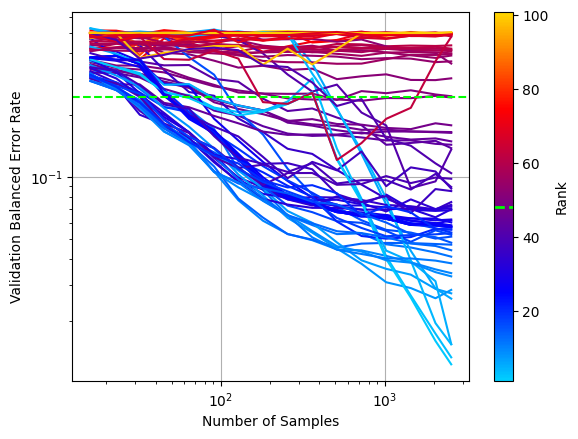

In [107]:
plot_observation_curves(df_results)

In [108]:
# res = get_observation_curve_data_nonaveraged(df_results)


In [109]:

results_array = get_observation_curve_data_numpy(df_results)

[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2556]


In [110]:
results_array

array([[[[[0.11111111, 0.32883253, 0.40098235],
          [0.25396825, 0.33865602, 0.41080584],
          [0.21666667, 0.33671872, 0.38818442],
          ...,
          [0.22202361, 0.2044147 , 0.23462878],
          [0.23311993, 0.21666471, 0.23136081],
          [0.23932124, 0.2136707 , 0.23762279]],

         [[0.11111111, 0.26460804, 0.28910806],
          [0.1468254 , 0.2728269 , 0.22871903],
          [0.15833333, 0.39068921, 0.34141521],
          ...,
          [0.23470545, 0.20142069, 0.21883684],
          [0.24603138, 0.21639075, 0.23680091],
          [0.24392053, 0.21639075, 0.24605691]],

         [[0.11111111, 0.29288482, 0.27247466],
          [0.28571429, 0.34268717, 0.30022308],
          [0.175     , 0.28906892, 0.30703299],
          ...,
          [0.20692783, 0.20795664, 0.21040272],
          [0.22874447, 0.2229267 , 0.22864076],
          [0.23461705, 0.22592071, 0.24361082]],

         [[0.05555556, 0.36341043, 0.3489883 ],
          [0.28571429, 0.37262729, 0.

In [111]:
results_array.shape
# shape of this array is as follows:
# 0st dim: configuration id
# 1st dim: val_seed
# 2nd dim: test_seed
# 3rd dim: anchor
# 4th dim: 0 = train, 1 = val, 2 = test

(100, 5, 5, 16, 3)

(100, 16, 3)

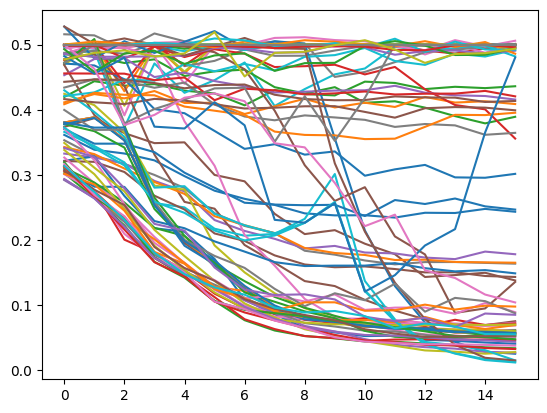

In [115]:
pooled = results_array.reshape(results_array.shape[0], 25, results_array.shape[3], 3)
averaged = np.nanmean(pooled, axis=1)
plt.plot(averaged[:, :, 1].T)

Note that there are generally some results missing so we need to write the code that is robust to missing values

In [116]:
np.isnan(results_array).sum()

np.int64(96)